# Fraud Detection System

### Modules in the Project

- Data Loading System
- Dataset Wrangling System
- Normalization and Encoding System
- Dataset Visualization System
- Model Training System
- Hperparameter Tuning
- Model Metric Calculation System
- Database System
- View manager
- Template Manager
- Model integration

---

*Contributors*
1. [Apurva Jaiswal](https://github.com/ApurvaJaiswal3398/)
2. [Suyash Mihir](https://github.com/mihirsuyash7/)

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

Loading Dataset and Counting the number of 'isFraud' values

In [2]:
df=pd.read_csv('dataset\Fraud_Detection_Dataset.csv')
df['isFraud'].value_counts()

isFraud
0    999464
1       535
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            999999 non-null  int64  
 1   type            999999 non-null  object 
 2   amount          999999 non-null  float64
 3   nameOrig        999999 non-null  object 
 4   oldbalanceOrg   999999 non-null  float64
 5   newbalanceOrig  999999 non-null  float64
 6   nameDest        999999 non-null  object 
 7   oldbalanceDest  999999 non-null  float64
 8   newbalanceDest  999999 non-null  float64
 9   isFraud         999999 non-null  int64  
 10  isFlaggedFraud  999999 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 83.9+ MB


Counting the 'NaN' values for 'isFraud' Column

In [4]:
pd.isna(df['isFraud']).value_counts()

isFraud
False    999999
Name: count, dtype: int64

Creating new Dataframe without Non-numerical Columns

In [5]:
df_new=df.drop(['isFraud','type','nameOrig','nameDest'],axis=1)
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.0,0.0,0
1,1,1864.28,21249.00,19384.72,0.0,0.0,0
2,1,181.00,181.00,0.00,0.0,0.0,0
3,1,181.00,181.00,0.00,21182.0,0.0,0
4,1,11668.14,41554.00,29885.86,0.0,0.0,0
...,...,...,...,...,...,...,...
999994,45,2987.49,579096.28,576108.80,0.0,0.0,0
999995,45,10913.42,576108.80,565195.38,0.0,0.0,0
999996,45,2014.46,565195.38,563180.92,0.0,0.0,0
999997,45,18839.45,563180.92,544341.47,0.0,0.0,0


In [56]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,45,PAYMENT,2987.49,C2072426611,579096.28,576108.80,M58668896,0.0,0.0,0,0
999995,45,PAYMENT,10913.42,C1384914558,576108.80,565195.38,M166797080,0.0,0.0,0,0
999996,45,PAYMENT,2014.46,C1207593845,565195.38,563180.92,M1027899613,0.0,0.0,0,0
999997,45,PAYMENT,18839.45,C260638437,563180.92,544341.47,M243388883,0.0,0.0,0,0


Splitting the Dataset into *Training* and *Testing Datasets*

In [6]:
from sklearn.model_selection import train_test_split
X = df_new
Y = df['isFraud']
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (799999, 7)
Number transactions y_train dataset:  (799999,)
Number transactions X_test dataset:  (200000, 7)
Number transactions y_test dataset:  (200000,)


In [7]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
760647,38,824837.46,0.00,0.00,1001059.08,1825896.53,0
79333,10,16142.81,363229.01,347086.20,0.00,0.00,0
905605,43,23919.37,0.00,0.00,172578.39,196497.75,0
179102,12,121000.03,110860.47,0.00,1025515.60,1404682.70,0
75318,10,149190.19,0.00,0.00,210821.30,360011.49,0
...,...,...,...,...,...,...,...
963395,44,478.34,70085.00,69606.66,0.00,0.00,0
117952,11,671493.76,0.00,0.00,11300000.00,12100000.00,0
435829,18,13819.33,0.00,0.00,1858720.70,2084278.02,0
305711,15,136847.95,298.00,0.00,183542.51,320390.46,0


In [8]:
tr = y_train == 1
tr.value_counts()

isFraud
False    799577
True        422
Name: count, dtype: int64

In [9]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
157105,12,11562.20,54709.00,43146.80,52907.99,64470.19,0
374554,17,97672.67,323928.00,226255.33,0.00,97672.67,0
973251,44,73829.19,49548.00,0.00,50243.63,124072.82,0
265381,15,205872.83,714471.00,920343.83,0.00,0.00,0
687074,36,69108.92,0.00,0.00,193425.32,262534.24,0
...,...,...,...,...,...,...,...
957384,44,381152.12,0.00,0.00,2408625.98,2789778.10,0
872293,42,101986.61,0.00,0.00,1048738.74,1150725.34,0
295258,15,441544.26,350007.73,0.00,2155569.73,2597113.99,0
568161,23,22640.17,0.00,0.00,0.00,0.00,0


In [10]:
(y_test == 1).value_counts()

isFraud
False    199887
True        113
Name: count, dtype: int64

Applying Logistic Regression and Checking the Accuracy

In [14]:
# logistic regression object
lr = LogisticRegression(solver='sag')

# train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

c:\Users\DELL\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199887
           1       0.00      0.00      0.00       113

    accuracy                           1.00    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       1.00      1.00      1.00    200000



c:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implementing SMOTE to balance the Dataset

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 422
Before OverSampling, counts of label '0': 799577 

After OverSampling, the shape of train_X: (1599154, 7)
After OverSampling, the shape of train_y: (1599154,) 

After OverSampling, counts of label '1': 799577
After OverSampling, counts of label '0': 799577


In [64]:
X_train_res

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,41,107360.280000,1.201500e+04,0.00,3.296851e+05,4.370454e+05,0
1,9,17804.010000,1.438162e+05,126012.23,0.000000e+00,0.000000e+00,0
2,33,171281.860000,7.543396e+06,7714677.77,1.582800e+06,1.411518e+06,0
3,33,1664.860000,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
4,36,441638.400000,0.000000e+00,0.00,3.000000e+07,3.050000e+07,0
...,...,...,...,...,...,...,...
1399243,42,42593.185914,4.259319e+04,0.00,7.717958e+03,0.000000e+00,0
1399244,1,24049.006815,2.404901e+04,0.00,1.000079e+04,3.404980e+04,0
1399245,1,1444.355545,1.444356e+03,0.00,2.359802e+04,0.000000e+00,0
1399246,11,117983.116337,1.179831e+05,0.00,4.007679e+06,4.125662e+06,0


In [65]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['isFraud', 'type', 'nameOrig', 'nameDest', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']))])

Applying Logistic Regression on the oversampled data

In [24]:
# logistic regression object
lr = LogisticRegression(solver='sag')

# train the model on train set
lr.fit(X_train_res, y_train_res.ravel())

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

c:\Users\DELL\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.91      0.95    199887
           1       0.01      0.92      0.01       113

    accuracy                           0.91    200000
   macro avg       0.50      0.92      0.48    200000
weighted avg       1.00      0.91      0.95    200000



<Axes: >

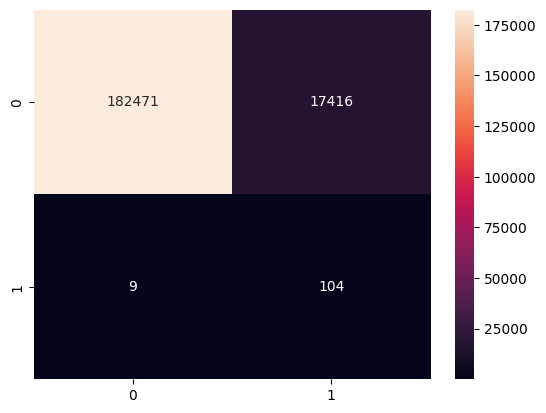

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')